<a href="https://colab.research.google.com/github/qedir314/Data-Science-From-Scratch/blob/main/Churn_SubclassingAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df = pd.read_csv("/content/Churn.csv")
df.head()

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,Yes
1,1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,No
2,2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,Yes
3,3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,No
4,4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,No


In [ ]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)
df["Exited"] = df["Exited"].apply(lambda x: 1 if x=="Yes" else 0)
df.head()

,Unnamed: 0,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,1
1,1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,0
2,2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,1
3,3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,0
4,4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("Exited",axis=1),df["Exited"],test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

obj_features = X_train.select_dtypes(include="object").columns
num_features = X_train.select_dtypes(exclude="object").columns

num_pipeline = make_pipeline(StandardScaler())
obj_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

transformer = ColumnTransformer([
    ("num",num_pipeline,num_features),
    ("obj",obj_pipeline,obj_features)
])

In [ ]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

feature_names = transformer.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_transformed,columns=feature_names)
X_test_df = pd.DataFrame(X_test_transformed,columns=feature_names)

In [ ]:
X_train_df.head()

,num__Unnamed: 0,num__CreditScore,num__Age,num__Tenure,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,num__EstimatedSalary,num__Complain,...,num__Point Earned,obj__Geography_France,obj__Geography_Germany,obj__Geography_Spain,obj__Gender_Female,obj__Gender_Male,obj__Card Type_DIAMOND,obj__Card Type_GOLD,obj__Card Type_PLATINUM,obj__Card Type_SILVER
0,1.469277,0.356500,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,-0.509942,...,-0.430193,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,-1.194994,-0.203898,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,-0.509942,...,1.565908,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.157244,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,1.961007,...,-1.243749,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.372469,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,1.961007,...,-0.176791,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.574030,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,1.961007,...,0.534515,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
class Model(tf.keras.Model):
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.flatten = tf.keras.layers.Flatten()
    self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
    self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
    self.output_layer = tf.keras.layers.Dense(1, activation="sigmoid")

  def call(self, inputs):
    flatten = self.flatten(inputs)
    hidden1 = self.hidden1(flatten)
    hidden2 = self.hidden2(hidden1)
    output = self.output_layer(hidden2)
    return output

model = Model(30, "relu", name="model")

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=("binary_crossentropy"), optimizer=optimizer, metrics=["accuracy"])

history = model.fit(X_train_df, y_train, epochs=10, validation_data=(X_test_df, y_test))

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7829 - loss: 0.4413 - val_accuracy: 0.9990 - val_loss: 0.0155
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9989 - loss: 0.0126 - val_accuracy: 0.9990 - val_loss: 0.0080
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9984 - loss: 0.0099 - val_accuracy: 0.9990 - val_loss: 0.0077
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9985 - loss: 0.0082 - val_accuracy: 0.9990 - val_loss: 0.0074
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9985 - loss: 0.0071 - val_accuracy: 0.9990 - val_loss: 0.0074
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9982 - loss: 0.0090 - val_accuracy: 0.9990 - val_loss: 0.0076
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9985 - loss: 0.0063 - val_accuracy: 0.9990 - val_loss: 0.0084
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9980 - loss: 0.0079 - val_accuracy: 0.

In [ ]:
eval_result = model.evaluate(X_test_df, y_test)
print("Test Loss:", eval_result[0], "Test Accuracy:", eval_result[1])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9993 - loss: 0.0069
Test Loss: 0.008382972329854965 Test Accuracy: 0.9990000128746033


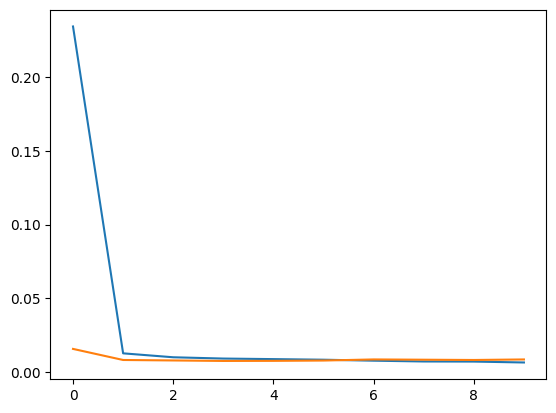

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()